# A notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

In this notebook you can make your own experiments by updating variables. Also You can watch some of the capabilities of ModelFlow

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 

This notebook implement the **VAR** flavour. 

The tool used is highly experimental and the results are purely for illustration. 

You can run each cell by pressing the run tool or shift+enter
To run all cells use select cell/run all in the menu bar. 

In [34]:
%load_ext autoreload
%autoreload 2

# Import Python libraries

In [1]:
%matplotlib inline

import pandas as pd
from numba import jit

from modelclass import model  
import modelmf

In [2]:
# model.modelflow_auto()

# Load the model and the data 
The model and the data has been prepared in a preprocessor step and has been wrapped into one file. 

In [3]:
mfrbus, basedf =  model.modelload('models/frbus_var.pcim')

res = mfrbus(basedf,'2021q1','2060q4',silent=1,stats=0)

# Run alternative 

In [4]:
# Make a new DataFrame
altdf = basedf.copy()

# Update variables in the dataframe
altdf.loc['2024q4','RFFINTAY_AERR'] = altdf.loc['2024q4','RFFINTAY_AERR']+0.5


#Run the model 
with model.timer('Solve Frbus'):
    res2 = mfrbus(altdf,ldumpvar = 0,solver='sim',newton_absconv=0.0001,ljit=1,stringjit=0)


Compile prolog: 100%|████████████████████████████████| 3/3 58.09code chunk/s
Compile core  : 100%|████████████████████████████████| 5/5 57.16code chunk/s
Compile epilog: 100%|████████████████████████████████| 3/3 50.03code chunk/s


Solve Frbus took       :         0.5787496567 Seconds


# Show the results 

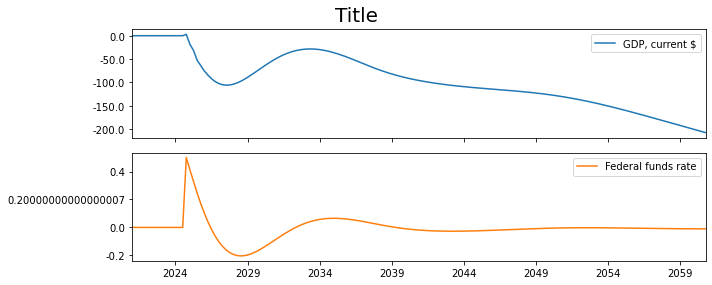

In [5]:
_ = mfrbus['XGDPN RFF'].dif.rename().plot(colrow=1,sharey=0)

# How is the interest rate determined

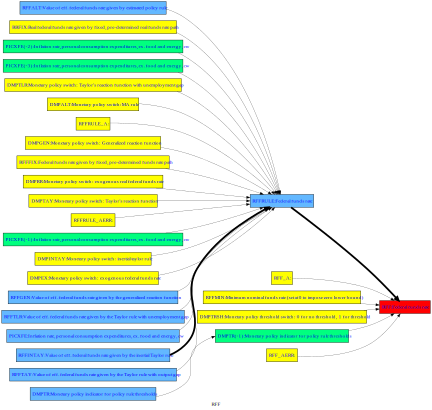

In [22]:
with mfrbus.set_smpl('2024q4','2027q4'):
    mfrbus.RFF.tracepre(up=2,HR=0,svg=1) 

# Lets look at how each variable contributes to changes in the equation

FRML <Z> RFFINTAY = RFFINTAY_A + RFFINTAY_AERR +  (.85*RFF(-1)+(1-.85)*(RSTAR+(PICXFE+PICXFE(-1)+PICXFE(-2)+PICXFE(-3))/4+0.5*((PICXFE+PICXFE(-1)+PICXFE(-2)+PICXFE(-3))/4-PITARG)+1.0*XGAP2))  $


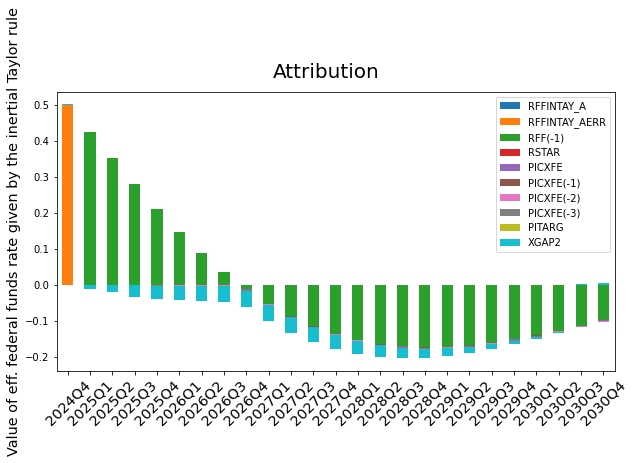

In [27]:
lookat = 'RFFINTAY'
with mfrbus.set_smpl('2024q4','2030q4'):
    print(mfrbus.allvar[lookat]['frml'])
    mfrbus.dekomp_plot(lookat,pct=0)

# We can look at attribution going back in the model 
Mouse-over will display the variable description

# Look at the model structure 

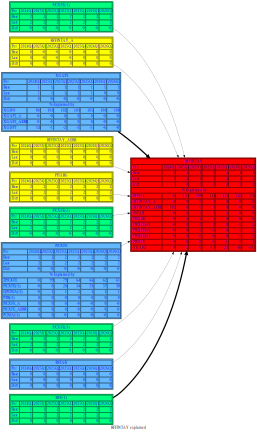

In [33]:
with mfrbus.set_smpl('2024q4','2026q2'):
     xx = mfrbus.rffintay.explain(up=1,svg=1,select=False);

['XGDO', 'XGAP2_A', 'ZPICXFE', 'PICXFE(-2)', 'PICXFE(-3)', 'RFF(-1)', 'RSTAR(-1)', 'XGDPT', 'RFFINTAY_A', 'XGAP2', 'PICXFE_A', 'RSTAR_AERR', 'PITARG', 'RFF', 'DRSTAR', 'PICXFE(-1)', 'RRFF', 'PTR(-1)', 'PICXFE_AERR', 'RFFINTAY_AERR', 'PICXFE', 'PCNIA(-1)', 'XGAP2_AERR', 'RSTAR_A', 'QPCNIA(-1)', 'RSTAR', 'RFFINTAY']
['XGDO', 'RRFF', 'XGDPT', 'PCNIA', 'RFFINTAY', 'ZPICXFE', 'XGAP2', 'QPCNIA', 'RFF', 'PICXFE', 'PTR', 'RSTAR']


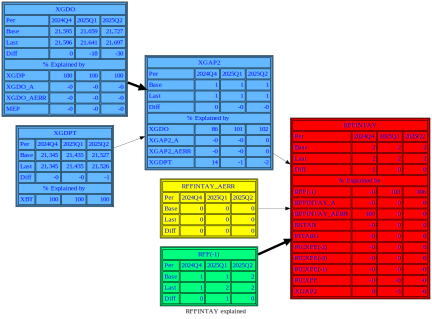

In [112]:
with mfrbus.set_smpl('2024q4','2025q2'):
      xx = mfrbus.rffintay.explain(up=2,svg=1,select=1.);

In [ ]:
if 0:  # set to 0 to skip, set to 1 to draw a dependency graph. Takes a little while 
    mfrbus.drawendo(lag=0,title='FRB/US endogeneous interpendencies',svg=1,browser=1)
# you will find the output files in different format in the /graph folder (graph/)

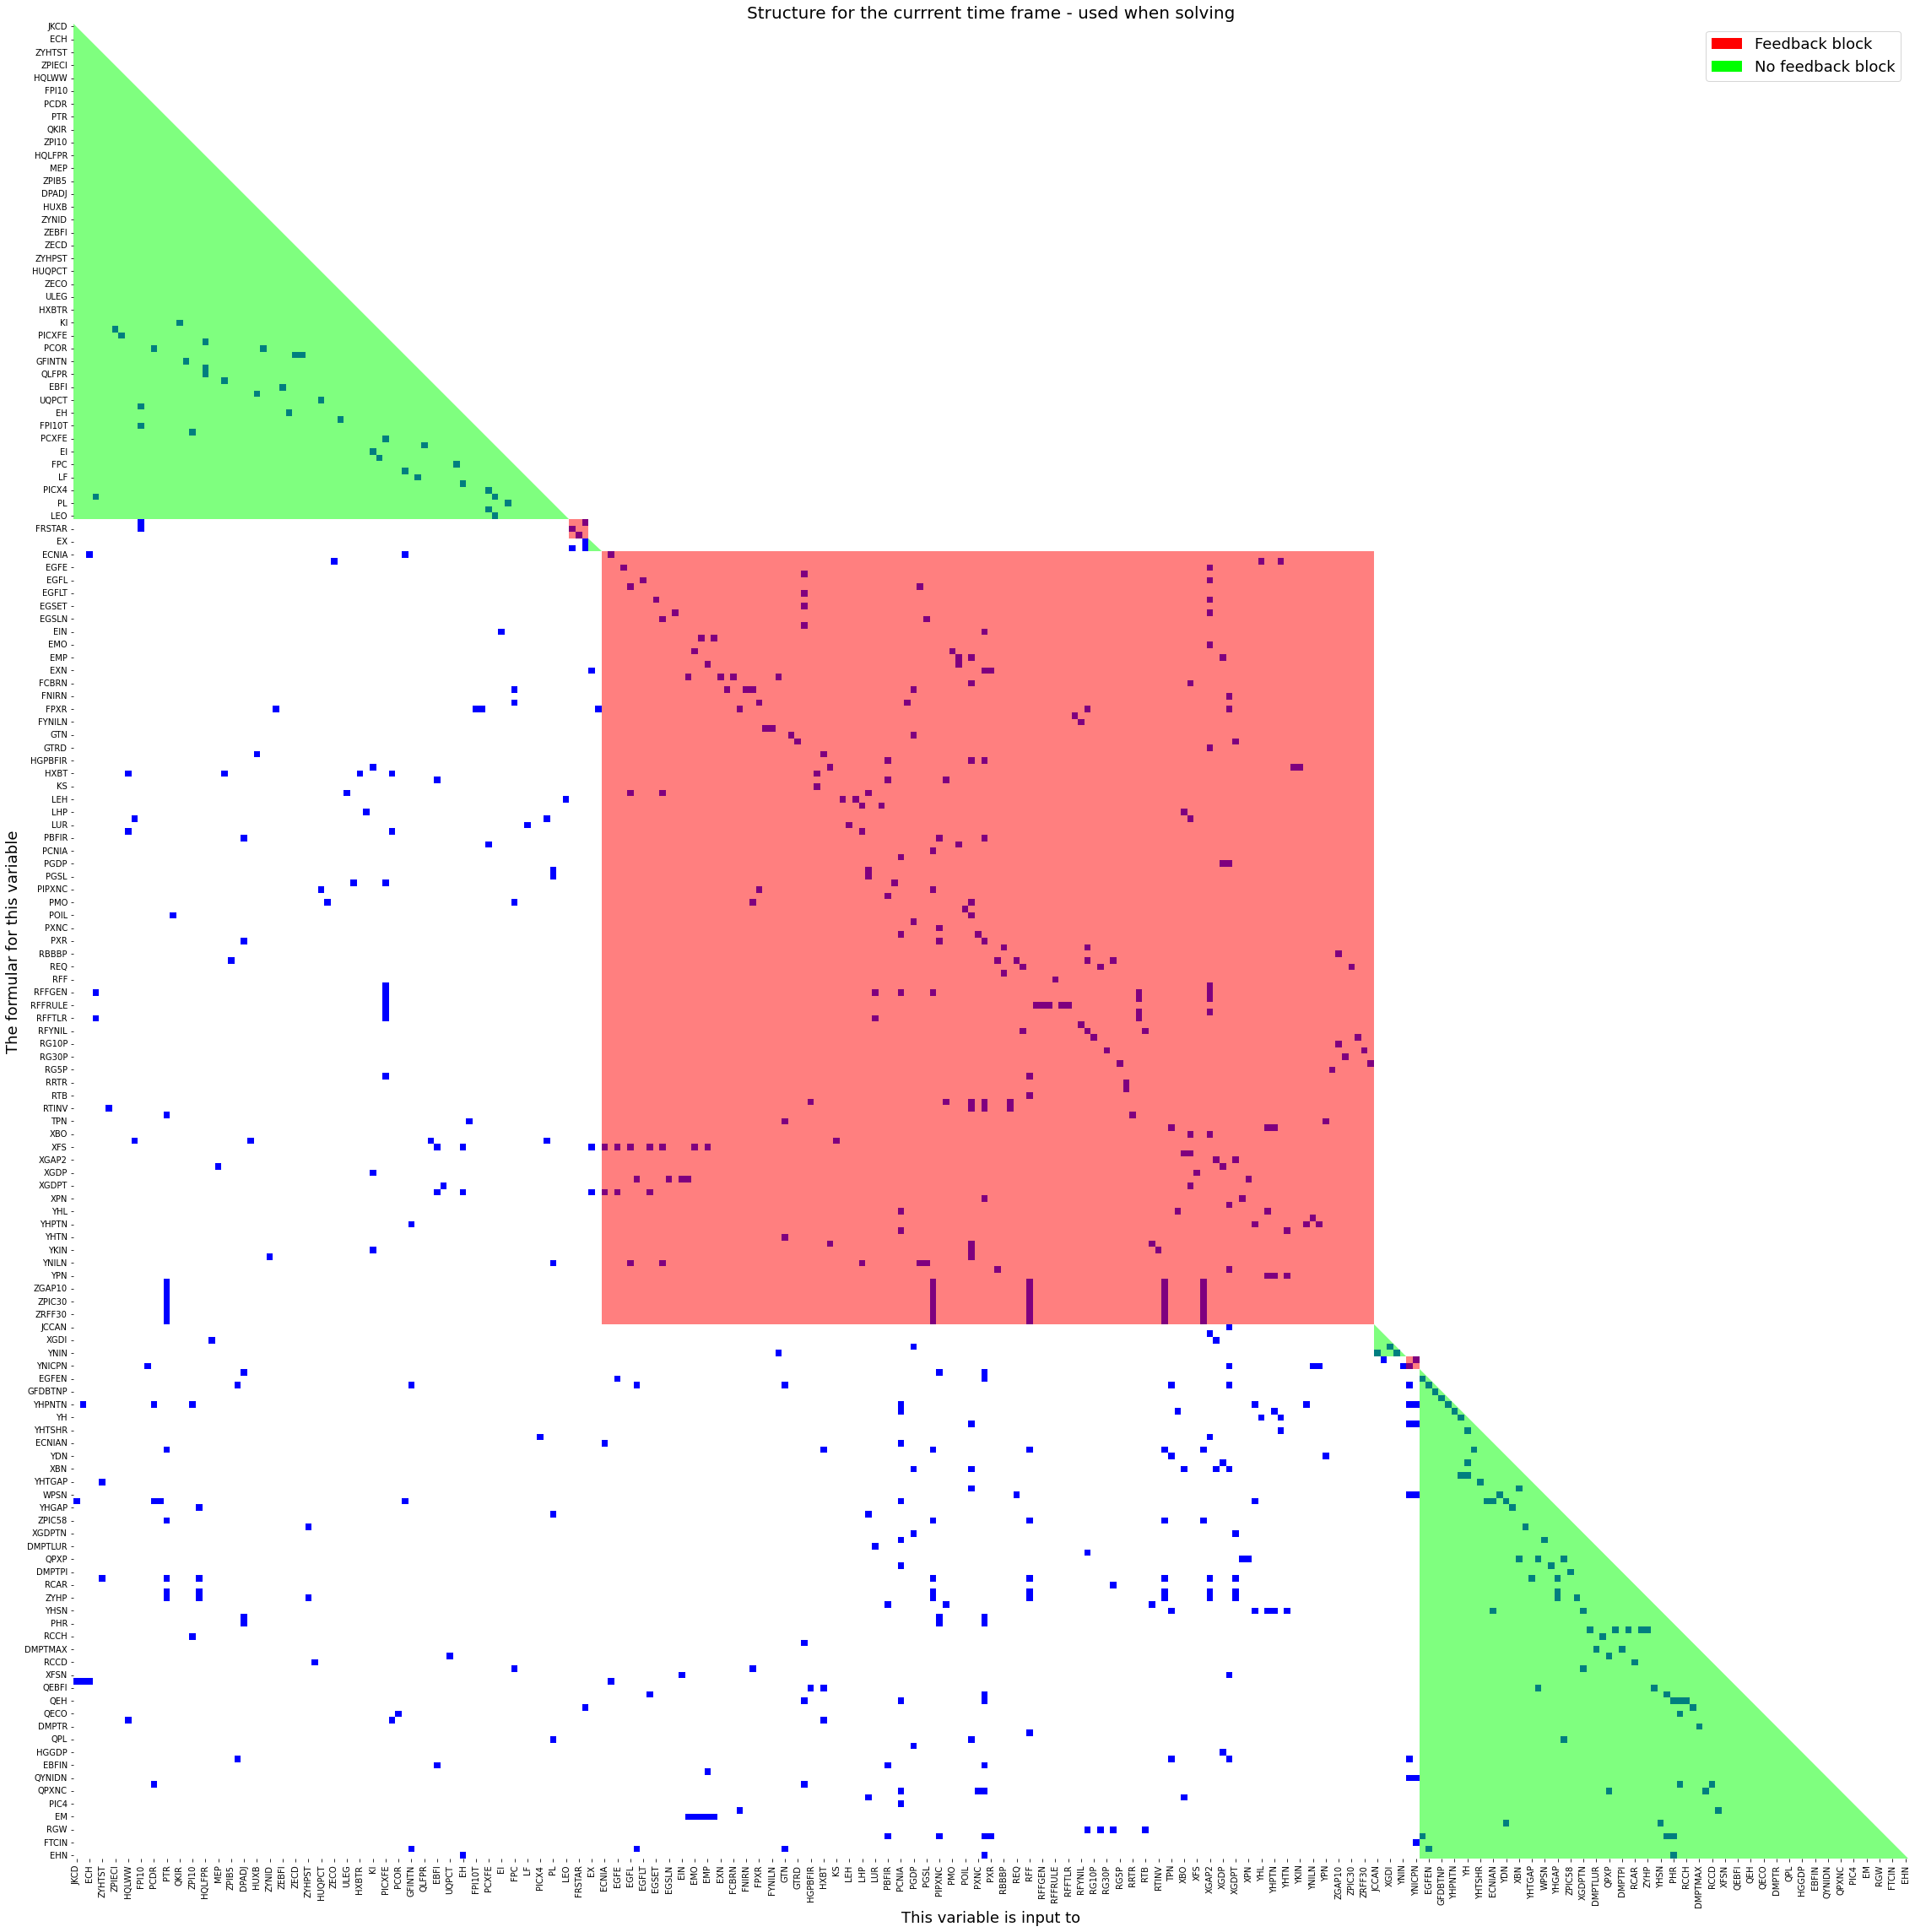

In [14]:
fig   = mfrbus.plotadjacency(size=(40,40),title= 'Structure for the currrent time frame - used when solving')
fig.savefig('graph/FRB-US causality structure current time.pdf')

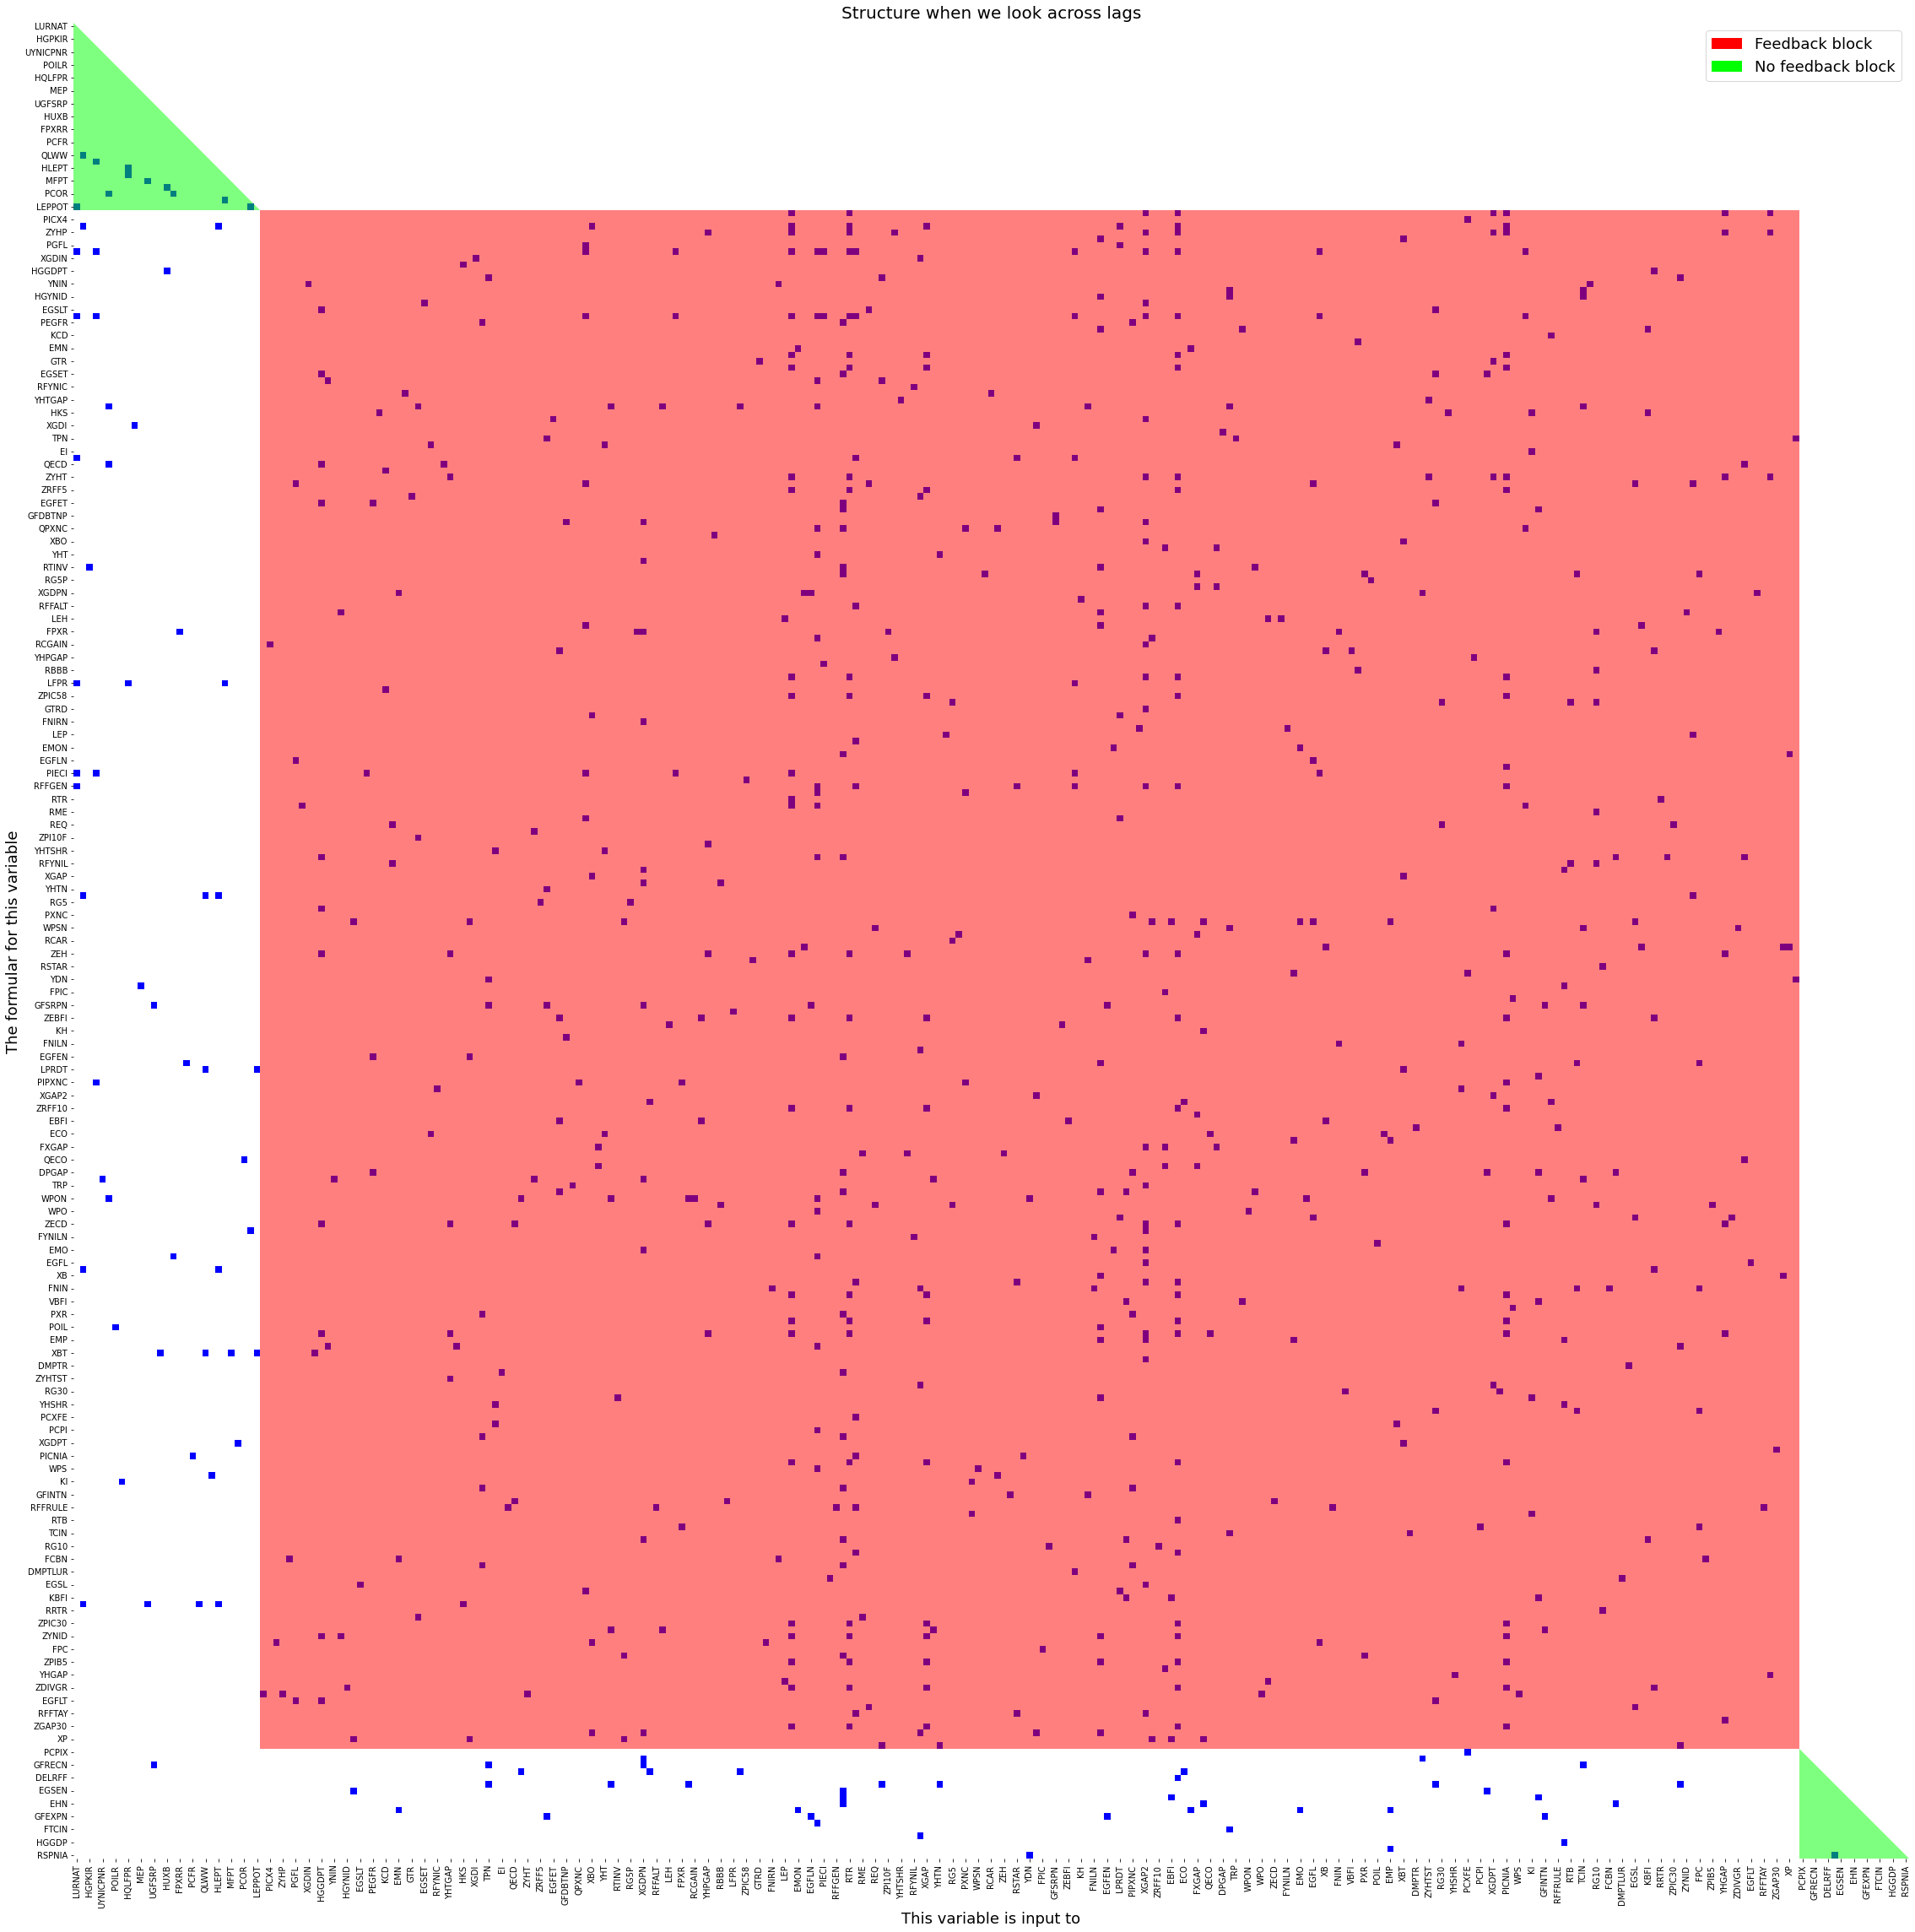

In [15]:
fig   = mfrbus.plotadjacency(size=(40,40),nolag=True,title='Structure when we look across lags')
fig.savefig('graph/FRB-US causality structure across lags.pdf')